---
title: Images
authors:
  - name: Sébastien Boisgérault
    affiliations:
      - Mines Paris – PSL University
      - Institut des Transformations Numériques
---

```{attention} TODO
- [ ] ...
```

In [1]:
import requests

import torch
import torchvision

import PIL
import matplotlib.pyplot as plt

In [2]:
IMAGE_URL = "https://unsplash.com/photos/3k9PGKWt7ik/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8Nnx8cmFpbmJvd3xlbnwwfDB8fHwxNzEyODI5NTAxfDA&force=true&w=640"
IMAGE_PATH = "data/pottery.jpg"

In [3]:
response = requests.get(IMAGE_URL)
with open(IMAGE_PATH, mode="bw") as file:
    file.write(response.content)

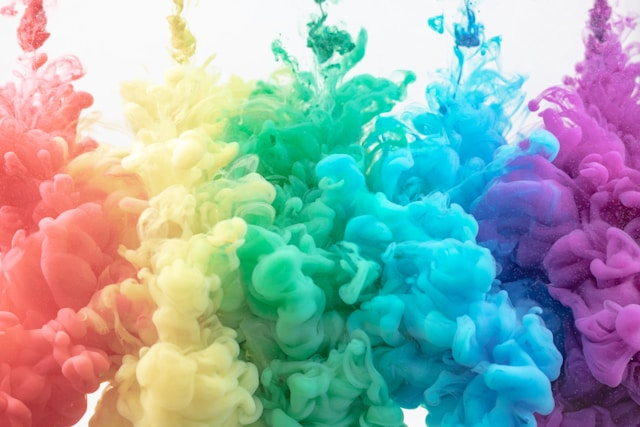

In [4]:
image = PIL.Image.open(IMAGE_PATH)
image

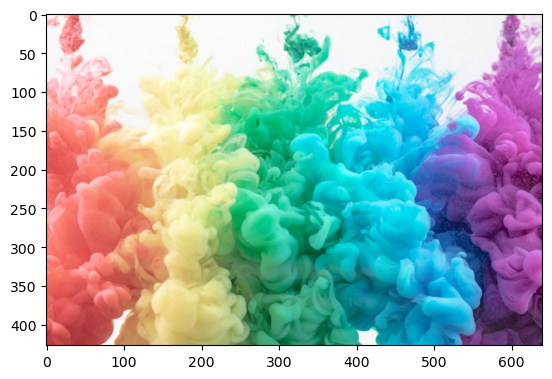

In [5]:
plt.imshow(image)
None

In [6]:
image_to_tensor = torchvision.transforms.PILToTensor()
tensor_to_image = torchvision.transforms.ToPILImage()

In [7]:
t = image_to_tensor(image)
t

tensor([[[246, 244, 244,  ..., 235, 235, 234],
         [249, 247, 246,  ..., 235, 235, 235],
         [253, 251, 249,  ..., 235, 235, 235],
         ...,
         [189, 189, 188,  ...,  76,  72,  72],
         [188, 188, 187,  ...,  74,  69,  67],
         [186, 185, 185,  ...,  71,  66,  64]],

        [[247, 248, 248,  ..., 233, 230, 229],
         [247, 247, 248,  ..., 233, 230, 230],
         [244, 245, 245,  ..., 233, 230, 230],
         ...,
         [ 64,  64,  63,  ...,  34,  28,  25],
         [ 63,  63,  62,  ...,  30,  22,  20],
         [ 63,  62,  62,  ...,  27,  19,  17]],

        [[249, 249, 247,  ..., 238, 237, 236],
         [250, 247, 247,  ..., 238, 237, 237],
         [247, 245, 244,  ..., 238, 237, 237],
         ...,
         [ 70,  70,  69,  ...,  84,  79,  77],
         [ 69,  69,  68,  ...,  81,  74,  72],
         [ 68,  67,  67,  ...,  78,  71,  69]]], dtype=torch.uint8)

In [8]:
t.shape # num_channel, height, width

torch.Size([3, 427, 640])

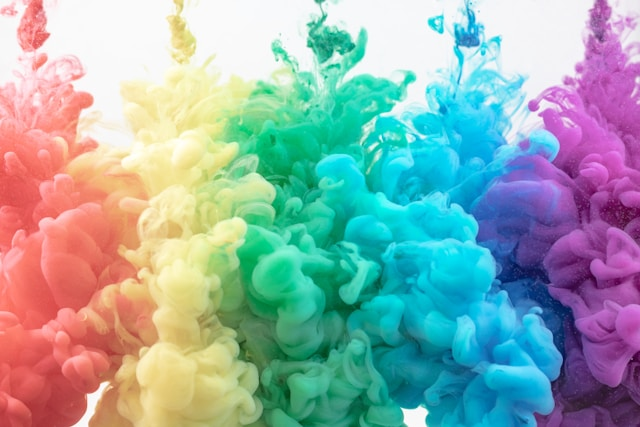

In [9]:
image = tensor_to_image(t)
image

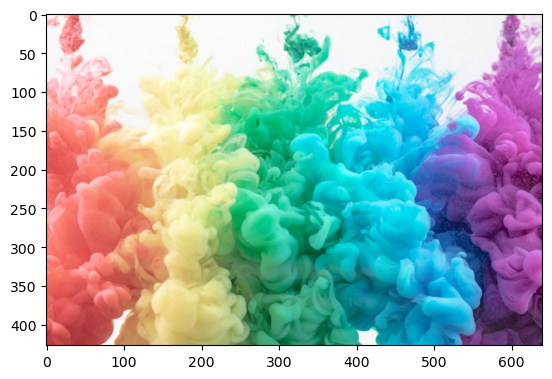

In [10]:
plt.imshow(t.permute(1, 2, 0)) # height, width, num_channels
None

## Color Components

In [11]:
R = t[0,:,:]
R

tensor([[246, 244, 244,  ..., 235, 235, 234],
        [249, 247, 246,  ..., 235, 235, 235],
        [253, 251, 249,  ..., 235, 235, 235],
        ...,
        [189, 189, 188,  ...,  76,  72,  72],
        [188, 188, 187,  ...,  74,  69,  67],
        [186, 185, 185,  ...,  71,  66,  64]], dtype=torch.uint8)

In [12]:
print(R.shape) # height, width

torch.Size([427, 640])


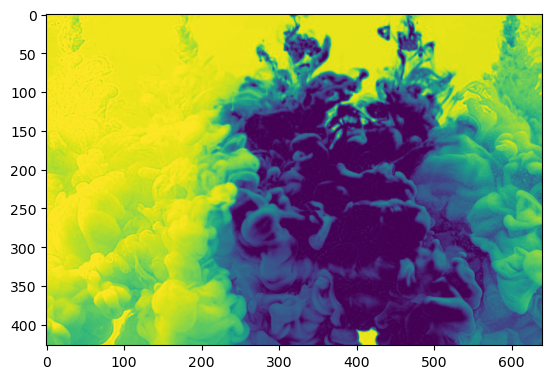

In [13]:
plt.imshow(R)
None

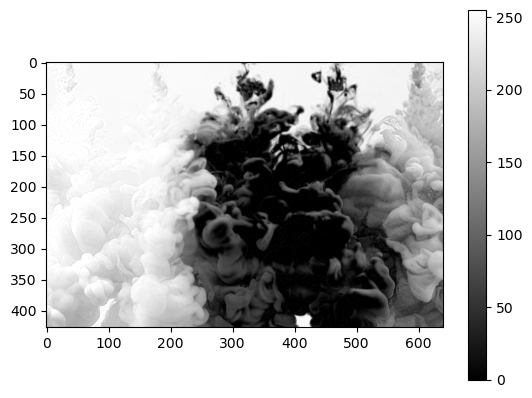

In [28]:
plt.imshow(R, cmap="grey")
plt.colorbar()
None

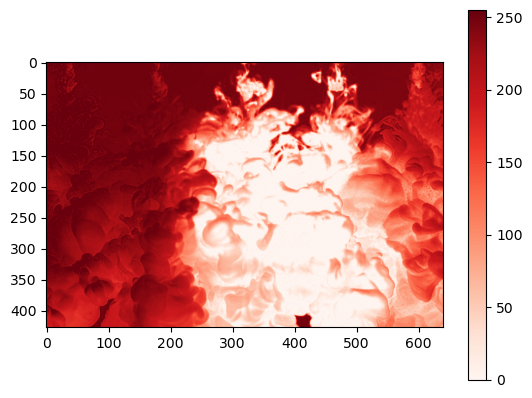

In [29]:
plt.imshow(R, cmap="Reds")
plt.colorbar()
None

In [16]:
G = t[1,:,:]
B = t[2,:,:]

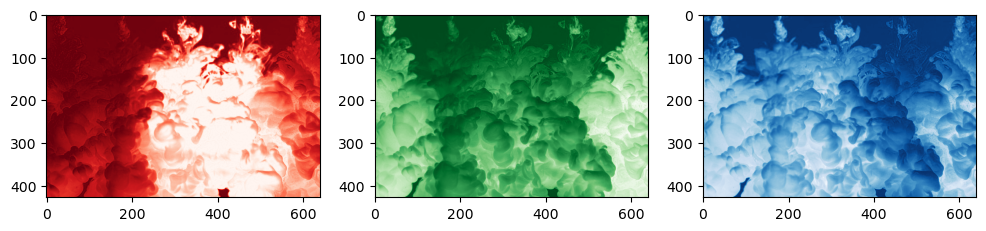

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(12)
ax1.imshow(R, cmap="Reds")
ax2.imshow(G, cmap="Greens")
ax3.imshow(B, cmap="Blues")
None

## Floating-Point Images

In [35]:
R.dtype

torch.uint8

In [37]:
Rf = R.type(torch.float64) / 256  # images with floating-points data should be in the [0, 1) range
Gf = G.type(torch.float64) / 256
Bf = B.type(torch.float64) / 256

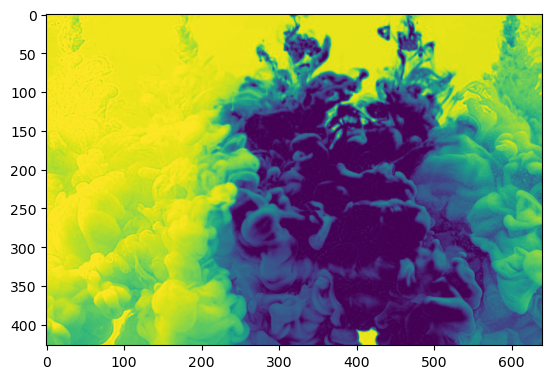

In [38]:
plt.imshow(Rf)
None

## Luminance

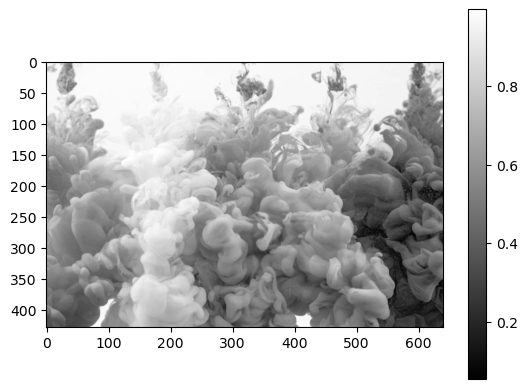

In [20]:
Lf = 0.2126*Rf + 0.7152*Gf + 0.0722*Bf
plt.imshow(Lf, cmap="grey")
plt.colorbar()
None

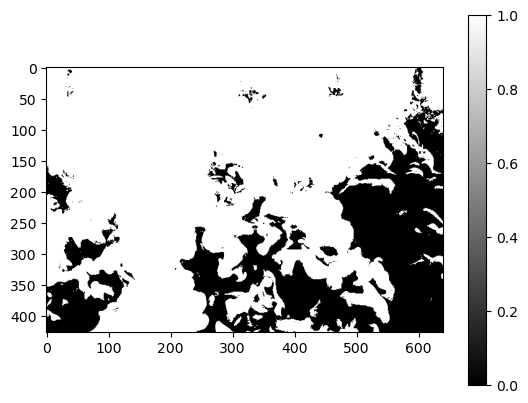

In [21]:
Lf = 0.2126*Rf + 0.7152*Gf + 0.0722*Bf
plt.imshow(Lf > 0.5, cmap="grey")
plt.colorbar()
None

## Hue, Saturation, Value (HSV)

**TODO.** <https://en.wikipedia.org/wiki/HSL_and_HSV>

## Color Statistics

In [22]:
tf = t.type(torch.float64) / 256

In [23]:
tf.shape

torch.Size([3, 427, 640])

In [24]:
_, h, w = tf.shape

In [25]:
colors = tf.permute(1, 2, 0).reshape(w*h, 3)

In [26]:
colors.mean(dim=0)

tensor([0.5724, 0.6716, 0.6640], dtype=torch.float64)

In [27]:
colors.std(dim=0)

tensor([0.3775, 0.2449, 0.2213], dtype=torch.float64)



## TODO

  - RGB -> CMY? HSL stuff (color rotation?) may be simpler and more visual.
  - reshape as list of pixels (=> color statistics)
  - More masking?
  - Cropping
  - Poisson diffusion (HARD ; make it single-pixel interpolation?)